In [38]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics

import os
os.chdir("D:/NUS/")
#os.getcwd()

from nltk.tokenize import word_tokenize
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.preprocessing import LabelEncoder
from collections import defaultdict
from nltk.corpus import wordnet as wn
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import model_selection, naive_bayes, svm
from sklearn.metrics import accuracy_score

import nltk
#nltk.download('stopwords')

from textblob import TextBlob
import seaborn as sns
from afinn import Afinn

In [39]:
data = pd.read_csv("./GitHub/BT4222_GrpProject/Output/data_clean&processed.csv")
data = data.drop(data.columns[0],axis=1)
data.sample(3)

,backers_count,blurb,category,converted_pledged_amount,country,created_at,current_currency,deadline,fx_rate,goal,id,launched_at,location,name,pledged,profile,slug,source_url,spotlight,staff_pick,state,state_changed_at,static_usd_rate,urls,usd_pledged,usd_type,story,faq,num_faq,comments,n_comments,duration,parent_category,category_name,location_name,month_launched,year_launched,backers_count_log,goal_log,pledged_log,duration_log,n_comments_log,num_faq_bool,avg_fund_per_backer,comments_afinn,blurb_name,faq_comments
779,22,Verve Collisionz is a hip hop group at the Uni...,"{'id': 254, 'name': 'Performances', 'slug': 'd...",904,US,2015-10-15 10:30,USD,2015-12-22 15:02,1.000000,600,1684830451,2015-10-23 15:02,"{""id"":2367231,""name"":""Boulder"",""slug"":""boulder...",VeRVE Collisionz,904.00,"{""id"":2176334,""project_id"":2176334,""state"":""in...",verve-collisionz,https://www.kickstarter.com/discover/categorie...,True,False,1,2015-12-22 15:02,1.000000,"{""web"":{""project"":""https://www.kickstarter.com...",904.000000,domestic,Verve Collisionz is a hip hop group at the Uni...,[' '],0,No comments yet.,0.0,60,Dance,Performances,Boulder,10,2015,-0.053267,-1.015913,0.019755,1.797704,-0.710711,0,41.090909,-1.0,Verve Collisionz is a hip hop group at the Uni...,[' ']No comments yet.
55,106,Search through an old computer to find the los...,"{'id': 35, 'name': 'Video Games', 'slug': 'gam...",836,SE,2018-05-07 14:43,USD,2018-06-07 13:42,0.120228,5000,1691646135,2018-05-08 13:42,"{""id"":908519,""name"":""Umeå"",""slug"":""umea-se"",""s...",256k - An augmented reality puzzle game.,7290.71,"{""id"":3375914,""project_id"":3375914,""state"":""in...",256k-an-augmented-reality-puzzle-game,https://www.kickstarter.com/discover/categorie...,True,False,1,2018-06-07 13:42,0.113662,"{""web"":{""project"":""https://www.kickstarter.com...",828.674639,international,"A few months back, I created the game 128k and...",[' '],0,Claire\nabout 2 years ago\nHaha sorry Petter. ...,16.0,30,Games,Video Games,Umeå,5,2018,0.788492,0.107232,0.679995,-0.012145,1.242119,0,68.780283,34.0,Search through an old computer to find the los...,[' ']Claire\nabout 2 years ago\nHaha sorry P...
417,197,FedCon Events Starportrait Buch mit über 200 F...,"{'id': 280, 'name': 'Photobooks', 'slug': 'pho...",26971,DE,2020-11-15 5:50,USD,2021-01-17 11:46,1.212886,17500,123877937,2020-12-18 11:46,"{""id"":636080,""name"":""Augsburg"",""slug"":""augsbur...",FedCon Events - Stars im Fokus,22328.00,"{""id"":4108609,""project_id"":4108609,""state"":""in...",fedcon-events-stars-im-fokus,https://www.kickstarter.com/discover/categorie...,True,False,1,2021-01-17 11:46,1.222525,"{""web"":{""project"":""https://www.kickstarter.com...",27296.544230,domestic,FedCon Events-Fotoband „Stars im Fokus“\nSeit ...,[' '],0,Ralf Dickmeis\n2 days ago\nDanke Dirk!\nDie Bü...,7.0,30,Photography,Photobooks,Augsburg,12,2020,1.125472,0.771229,1.034122,-0.012145,0.722572,0,113.340102,-6.0,FedCon Events Starportrait Buch mit über 200 F...,[' ']Ralf Dickmeis\n2 days ago\nDanke Dirk!\...


In [40]:
data.isna().sum()

backers_count               0
blurb                       0
category                    0
converted_pledged_amount    0
country                     0
created_at                  0
current_currency            0
deadline                    0
fx_rate                     0
goal                        0
id                          0
launched_at                 0
location                    0
name                        0
pledged                     0
profile                     0
slug                        0
source_url                  0
spotlight                   0
staff_pick                  0
state                       0
state_changed_at            0
static_usd_rate             0
urls                        0
usd_pledged                 0
usd_type                    0
story                       0
faq                         0
num_faq                     0
comments                    0
n_comments                  0
duration                    0
parent_category             0
category_n

In [41]:
#fill na with na
data = data.fillna("na")

## Create a dataset for text and sentiment analysis

In [42]:
data_text = data[["blurb_name","comments","story","faq","state", "faq_comments", "blurb", "name"]]
data_text.sample(5)

,blurb_name,comments,story,faq,state,faq_comments,blurb,name
247,The Officially Authorized Graphic Novel of the...,FantaCo Enterprises LLCCreator\nover 1 year ag...,This is an Officially Authorized NIGHT OF THE ...,[' '],1,[' ']FantaCo Enterprises LLCCreator\nover 1 ...,The Officially Authorized Graphic Novel of the...,NIGHT OF THE LIVING DEAD™ Graphic Novel - 50th...
430,"Two out-of-town executives close a huge deal, ...",No comments yet.,"Geraldo Olivo and Robert Cortez, Tranquilo W...",[' '],1,[' ']No comments yet.,"Two out-of-town executives close a huge deal, ...",Visitors Only: A Short Film by Tranquilo Way
260,An Exploration of the Imagination DimensionGli...,No comments yet.,Welcome to the Glitter+Gold Kickstarter Campai...,[' '],1,[' ']No comments yet.,An Exploration of the Imagination Dimension,Glitter+Gold
23,Tragedy: All Metal Tribute to the Bee Gees & B...,Terry Smith\nover 7 years ago\nReceived my pac...,Tragedy: All Metal Tribute to the Bee Gees & B...,[' '],1,[' ']Terry Smith\nover 7 years ago\nReceived...,Tragedy: All Metal Tribute to the Bee Gees & B...,"Tragedy: Death to False Disco-Metal - new CD, ..."
961,Escape the Chamber is a real-life escape the r...,Jarib & Daylin FigueredoCreator\nover 4 years ...,About our project:\nWe are creating a pre apoc...,[' '],0,[' ']Jarib & Daylin FigueredoCreator\nover 4...,Escape the Chamber is a real-life escape the r...,Escape the Chamber! A real-life escape game.


In [43]:
data_text.isna().sum()

blurb_name      0
comments        0
story           0
faq             0
state           0
faq_comments    0
blurb           0
name            0
dtype: int64

### Exploring text cols

In [44]:
data_text["faq"][39]

'[" How can I pledge to receive more than one copy of the game? I have added two bundle options, allowing to pledge for multiple copies of the game. If you would like to pledge for more than two, please contact me directly. All backers who pledge for either bundle pack are eligible to choose between white or grey when the campaign ends. The choice will be available on the backer survey. Fri, Oct 19 2018 11:37 pm EDT When backing at the $249 tier, will all the cartridges include the 5 backers names in the credits, or will only those 5 cartridges have custom text? Why not both? When backing at the $249 level, your name will be included in the game credits listed at the title in all versions, along with a message of your choice that will only be included on your personal cartridge. If you\'d prefer to keep your name out of the credits, that\'s fine too. It\'s all up to you! Fri, Oct 19 2018 11:37 pm EDT How can I get the vinyl soundtrack if I\'ve pledged for the special edition clear cart

In [45]:
data_text["blurb"][39]

'Over 90 levels to explore on your NES. Soundtrack now available on vinyl!'

In [46]:
data_text["name"][39]

"Alfonzo's Arctic Adventure - A new game for the NES"

In [47]:
data_text["story"][39]

'Alfonzo\'s Arctic Adventure is a brand-new platformer game for the NES. After running a successful campaign in 2017 to fund production of Eskimo Bob: Starring Alfonzo, I\'ve been hard at work creating something even bigger and better. This time, Bob is missing, and it\'s up to Alfonzo to find him. Great care was taken to preserve everything that made the original so much fun, while at the same time creating something new and exciting. I\'m extremely proud at how this game has turned out.\nI will also be porting the game to Nintendo 3DS and Steam, complete with achievements. All backers for the digital tier or above will be given the choice between a 3DS or Steam download key in addition to the NES ROM. These ports will be released after the NES launch, later in 2019.\nAlfonzo\'s Arctic Adventure is packed with tons of new features and content!\nFour different playable characters\nOver 90 levels split into 6 episodes  \nMore than 30 types of enemies to encounter  \nSeven unique boss ba

In [48]:
data_text["comments"][39]

"James | The Bacon Strip\n8 months ago\nIt’s been a tad bit over a half a year since the last update could I ask when the 3DS port is coming? It seems to not be happening, so if it isn’t could I at least have the PC version? Thanks\nTomas GuinanCreator\n7 months ago\nHey James, I've sent you a Steam key.\nThe 3DS version has run into some technical issues. A straight port of the PC version is a lot more difficult than I had initially expected, even if I were to limit it to new 3DS systems. I'm currently exploring some other platforms for release as well, but I haven't totally given up on 3DS yet.\nDaniel Karlsson\n11 months ago\nWhen is the 3ds version coming out?\nMitchell Pachnik\nalmost 2 years ago\nThank you so much for making a physical game :) you and your brother brought me joy and happiness back in the day on Newgrounds and I was happy this came around when it did.\nAgain Thank you so Much!\nOn another note When will the game be out on 3DS?\nTomas GuinanCreator\nalmost 2 years 

# Part 1: Text Analysis on Story

In [12]:
# define X and y
X = data_text.story 
y = data_text.state

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

print("test target distribution")
print(y_test.shape)
print(y_test.value_counts())

print("\ntrain target distribution")
print(y_train.shape)
print(y_train.value_counts())

test target distribution
(247,)
1    153
0     94
Name: state, dtype: int64

train target distribution
(738,)
1    465
0    273
Name: state, dtype: int64


In [21]:
#Get null accuracy

y_test.value_counts().head(1) / y_test.shape

1    0.619433
Name: state, dtype: float64

In [22]:
# define a function that accepts a vectorizer and calculates the accuracy

def tokenize_test(X_train, y_train, X_test, y_test, vect, model=MultinomialNB()):
    # create document-term matrices using the vectorizer
    X_train_dtm = vect.fit_transform(X_train)
    X_test_dtm = vect.transform(X_test)
    
    # print the number of features that were generated
    print('Features: ', X_train_dtm.shape[1])
    
    # fit model to predict the star rating
    model.fit(X_train_dtm, y_train)
    y_pred_class = model.predict(X_test_dtm)
    
    # Get the training accuracy
    print('Training Accuracy: ', metrics.accuracy_score(y_train, model.predict(X_train_dtm)))
    
    # print the accuracy of its predictions
    print('Validation Accuracy: ', metrics.accuracy_score(y_test, y_pred_class))

## Model 1: Use CountVect & NB as model

In [23]:
#use default params
vect = CountVectorizer()
tokenize_test(X_train, y_train, X_test, y_test, vect)

Features:  33919
Training Accuracy:  0.9688346883468835
Validation Accuracy:  0.6963562753036437


In [24]:
# Tuninng params 1

vect = CountVectorizer(ngram_range=(1, 2), max_features=5000, max_df=0.5, min_df=2, stop_words='english')
tokenize_test(X_train, y_train, X_test, y_test, vect)

Features:  5000
Training Accuracy:  0.8915989159891599
Validation Accuracy:  0.708502024291498


In [25]:
# Tuninng params 2 (use this)

vect = CountVectorizer(ngram_range=(1, 3), max_features=8000, max_df=0.5, min_df=2, stop_words='english')
tokenize_test(X_train, y_train, X_test, y_test, vect)

Features:  8000
Training Accuracy:  0.907859078590786
Validation Accuracy:  0.7165991902834008


In [26]:
#Get most predictable word for each class
vect = CountVectorizer(ngram_range=(1, 3), max_features=8000, max_df=0.5, min_df=2, stop_words='english')

X_train_dtm = vect.fit_transform(X_train)
X_test_dtm = vect.transform(X_test)

nb = MultinomialNB()
nb.fit(X_train_dtm, y_train)
y_pred_class = nb.predict(X_test_dtm)

fail_token_ratio = nb.feature_count_[0] / nb.class_count_[0]
success_token_ratio = nb.feature_count_[1] / nb.class_count_[1]

#Check num of features
len(fail_token_ratio)

8000

In [27]:
print("Top Tokens that leads to failure")

fail_tokens = {'token': vect.get_feature_names(), 'ratio': (fail_token_ratio+1)/(success_token_ratio+1)}
fail_tokens = pd.DataFrame(data=fail_tokens)
fail_tokens.sort_values("ratio", ascending=False).head(15)

Top Tokens that leads to failure


,token,ratio
2194,energy,1.171868
5889,regulations,1.162336
6486,site,1.155570
462,app,1.141313
7071,thailand,1.135531
7613,violin,1.130699
1506,cortometraje,1.116079
7805,wind,1.111625
944,builder,1.107508
7093,theme,1.104182


In [28]:
print("Top Tokens that leads to success")

success_tokens = {'token': vect.get_feature_names(), 'ratio': (success_token_ratio+1)/(fail_token_ratio+1)}
success_tokens = pd.DataFrame(data=success_tokens)
success_tokens.sort_values("ratio", ascending=False).head(15)

Top Tokens that leads to success


,token,ratio
3742,kickstarter,1.588025
1006,campaign,1.570307
281,add,1.563654
841,book,1.529080
6776,stretch,1.505427
5284,pledge,1.498691
5218,pin,1.476189
2297,et,1.439079
5226,pins,1.419858
5523,production,1.395907


#### Success token words not as meaningful

In [29]:
#looking at 2-3 words for success story (more)

vect = CountVectorizer(ngram_range=(2, 3), max_features=8000, max_df=0.5, min_df=2, stop_words='english')

X_train_dtm = vect.fit_transform(X_train)
X_test_dtm = vect.transform(X_test)

nb = MultinomialNB()
nb.fit(X_train_dtm, y_train)
y_pred_class = nb.predict(X_test_dtm)

fail_token_ratio = nb.feature_count_[0] / nb.class_count_[0]
success_token_ratio = nb.feature_count_[1] / nb.class_count_[1]

success_tokens = {'token': vect.get_feature_names(), 'ratio': (success_token_ratio+1)/(fail_token_ratio+1)}
success_tokens = pd.DataFrame(data=success_tokens)
success_tokens.sort_values("ratio", ascending=False).head(15)

,token,ratio
6010,stretch goal,1.277921
6028,stretch goals,1.215538
222,add ons,1.161337
2938,new york,1.141145
2228,kickstarter campaign,1.104301
416,award winning,1.081272
2701,mental health,1.068219
1884,hard enamel,1.067059
3924,post production,1.063179
1312,enamel pin,1.063179


## Model 2: Use NLTK & Lemmatization preprocessing

In [55]:
# To lower case
data_text_nlkt = data_text.copy()
data_text_nlkt['story'] = [entry.lower() for entry in data_text_nlkt['story']]

# Tokenise
data_text_nlkt['story']= [word_tokenize(entry) for entry in data_text_nlkt['story']]

In [56]:
#Word lemma
tag_map = defaultdict(lambda : wn.NOUN)
tag_map['J'] = wn.ADJ
tag_map['V'] = wn.VERB
tag_map['R'] = wn.ADV

for index,entry in enumerate(data_text_nlkt['story']):
    # Declaring Empty List to store the words that follow the rules for this step
    Final_words = []
    
    # Initializing WordNetLemmatizer()
    word_Lemmatized = WordNetLemmatizer()
    
    # pos_tag function below will provide the 'tag' i.e if the word is Noun(N) or Verb(V) or something else.
    for word, tag in pos_tag(entry):
        # Below condition is to check for Stop words and consider only alphabets
        if word not in stopwords.words('english') and word.isalpha():
            word_Final = word_Lemmatized.lemmatize(word,tag_map[tag[0]])
            Final_words.append(word_Final)
    # The final processed set of words for each iteration will be stored in 'text_final'
    data_text_nlkt.loc[index,'text_final'] = str(Final_words)

In [58]:
data_text_nlkt['text_final'][5]

"['man', 'land', 'company', 'present', 'inaugural', 'production', 'female', 'cast', 'creative', 'team', 'company', 'create', 'brave', 'safe', 'female', 'non', 'binary', 'currently', 'seek', 'space', 'produce', 'want', 'accommodate', 'many', 'audience', 'get', 'unfortunately', 'new', 'york', 'city', 'expensive', 'receive', 'go', 'straight', 'production', 'theatrical', 'venue', 'help', 'create', 'diverse', 'inclusive', 'future', 'new', 'york', 'city', 'thank', 'support', 'man', 'land', 'company', 'production', 'follow', 'man', 'land', 'get']"

In [95]:
X_train, X_test, y_train, y_test = train_test_split(data_text_nlkt['text_final'], data_text_nlkt["state"], random_state=42)

In [96]:
#use default params
vect = CountVectorizer()
tokenize_test(X_train, y_train, X_test, y_test, vect, model=MultinomialNB())

Features:  11059
Training Accuracy:  0.9417344173441734
Validation Accuracy:  0.6923076923076923


In [97]:
#Try tunning (countVect)
vect = CountVectorizer(ngram_range=(1, 2), max_features=5000, max_df=0.3, min_df=2, stop_words='english')
tokenize_test(X_train, y_train, X_test, y_test, vect)

Features:  5000
Training Accuracy:  0.9051490514905149
Validation Accuracy:  0.7125506072874493


In [98]:
#Try tunning (TF-idf)
vect = TfidfVectorizer(ngram_range=(1, 2), min_df=2, max_features=5000, max_df=0.5, norm=None, stop_words='english')
tokenize_test(X_train, y_train, X_test, y_test, vect)

Features:  5000
Training Accuracy:  0.9349593495934959
Validation Accuracy:  0.708502024291498


#### Score is about the same, but maybe test for interpretability

In [99]:
#Get most predictable word for each class
vect = TfidfVectorizer(ngram_range=(1, 2), min_df=2, max_features=5000, max_df=0.5, norm=None, stop_words='english')

X_train_dtm = vect.fit_transform(X_train)
X_test_dtm = vect.transform(X_test)

nb = MultinomialNB()
nb.fit(X_train_dtm, y_train)
y_pred_class = nb.predict(X_test_dtm)

fail_token_ratio = nb.feature_count_[0] / nb.class_count_[0]
success_token_ratio = nb.feature_count_[1] / nb.class_count_[1]

#Check num of features
len(fail_token_ratio)

5000

In [100]:
print("Top Tokens that leads to failure (lemma & tf-idf)")

fail_tokens = {'token': vect.get_feature_names(), 'ratio': (fail_token_ratio+1)/(success_token_ratio+1)}
fail_tokens = pd.DataFrame(data=fail_tokens)
fail_tokens.sort_values("ratio", ascending=False).head(15)

Top Tokens that leads to failure (lemma & tf-idf)


,token,ratio
1659,float,1.821465
4752,violin,1.722811
526,builder,1.691354
4508,toad,1.667848
3311,porcelain,1.572991
1374,energy,1.564628
3267,playa,1.554815
4882,wind,1.499175
4039,site,1.453660
3531,pumpkin,1.432797


In [101]:
print("Top Tokens that leads to success (lemma & tf-idf)")

success_tokens = {'token': vect.get_feature_names(), 'ratio': (success_token_ratio+1)/(fail_token_ratio+1)}
success_tokens = pd.DataFrame(data=success_tokens)
success_tokens.sort_values("ratio", ascending=False).head(15)

Top Tokens that leads to success (lemma & tf-idf)


,token,ratio
1139,di,3.204929
3235,pin,2.652629
56,add,2.331503
2992,och,2.328115
4248,stretch,2.250921
1030,dance,2.209584
2965,nous,2.160293
3274,pledge,2.133221
567,campaign,2.067699
3756,reward,1.913468


In [102]:
#looking at 2 for success story (might be more meaningful)

vect = TfidfVectorizer(ngram_range=(2, 2), min_df=2, max_features=5000, max_df=0.5, norm=None, stop_words='english')

X_train_dtm = vect.fit_transform(X_train)
X_test_dtm = vect.transform(X_test)

nb = MultinomialNB()
nb.fit(X_train_dtm, y_train)
y_pred_class = nb.predict(X_test_dtm)

fail_token_ratio = nb.feature_count_[0] / nb.class_count_[0]
success_token_ratio = nb.feature_count_[1] / nb.class_count_[1]

success_tokens = {'token': vect.get_feature_names(), 'ratio': (success_token_ratio+1)/(fail_token_ratio+1)}
success_tokens = pd.DataFrame(data=success_tokens)
success_tokens.sort_values("ratio", ascending=False).head(15)

,token,ratio
4290,stretch goal,1.840224
58,add ons,1.670439
2622,new york,1.397909
1380,fairy tale,1.328610
2414,mental health,1.324894
1746,hard enamel,1.298888
1294,enamel pin,1.287495
2997,post production,1.246789
52,add additional,1.241002
1041,dance company,1.239477


In [104]:
y_test.value_counts().head(1) / y_test.shape

1    0.619433
Name: state, dtype: float64

### Use SVM to predict

In [103]:
vect = TfidfVectorizer(ngram_range=(1, 2), min_df=2, max_features=5000, max_df=0.5, norm=None, stop_words='english')

SVM = svm.SVC(C=1, kernel='linear', degree=2, gamma='auto')
tokenize_test(X_train, y_train, X_test, y_test, vect, model=SVM)

Features:  5000
Training Accuracy:  0.9986449864498645
Validation Accuracy:  0.6923076923076923


In [113]:
SVM = svm.SVC(C=5.0, kernel='poly', degree=2, gamma='auto')
tokenize_test(X_train, y_train, X_test, y_test, vect, model=SVM)

Features:  5000
Training Accuracy:  0.9498644986449865
Validation Accuracy:  0.680161943319838


#### SVM does not work as well

# Part 2: Text Analysis on FAQ

In [163]:
# define X and y
X = data_text.faq
y = data_text.state

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

#Get null accuracy
y_test.value_counts().head(1) / y_test.shape

1    0.619433
Name: state, dtype: float64

In [164]:
#use default params (CountVect)
vect = CountVectorizer()
tokenize_test(X_train, y_train, X_test, y_test, vect)

Features:  2986
Training Accuracy:  0.6314363143631436
Validation Accuracy:  0.6153846153846154


In [165]:
#After tune
# Tuninng params 1

vect = CountVectorizer(ngram_range=(1, 2), max_df=0.5, min_df=1, stop_words='english')
tokenize_test(X_train, y_train, X_test, y_test, vect)

Features:  12953
Training Accuracy:  0.6463414634146342
Validation Accuracy:  0.6194331983805668


#### result same as null prediction

### Use NLTK & Lemmatization preprocessing

In [125]:
# To lower case
data_text_nlkt = data_text.copy()
data_text_nlkt['faq'] = [entry.lower() for entry in data_text_nlkt['faq']]

# Tokenise
data_text_nlkt['faq']= [word_tokenize(entry) for entry in data_text_nlkt['faq']]

#Word lemma
tag_map = defaultdict(lambda : wn.NOUN)
tag_map['J'] = wn.ADJ
tag_map['V'] = wn.VERB
tag_map['R'] = wn.ADV

for index,entry in enumerate(data_text_nlkt['faq']):
    # Declaring Empty List to store the words that follow the rules for this step
    Final_words = []
    
    # Initializing WordNetLemmatizer()
    word_Lemmatized = WordNetLemmatizer()
    
    # pos_tag function below will provide the 'tag' i.e if the word is Noun(N) or Verb(V) or something else.
    for word, tag in pos_tag(entry):
        # Below condition is to check for Stop words and consider only alphabets
        if word not in stopwords.words('english') and word.isalpha():
            word_Final = word_Lemmatized.lemmatize(word,tag_map[tag[0]])
            Final_words.append(word_Final)
    # The final processed set of words for each iteration will be stored in 'text_final'
    data_text_nlkt.loc[index,'text_final'] = str(Final_words)

In [154]:
for i in range(0,len(data_text_nlkt)):
    if len(data_text_nlkt['text_final'][i]) > 2:
        print(data_text_nlkt['text_final'][i])

['pledge', 'meet', 'pledge', 'goal', 'nobody', 'end', 'campaign', 'pledge', 'goal', 'meet', 'wed', 'mar']
['consult', 'company', 'company', 'base', 'right', 'firm', 'large', 'part', 'collectively', 'experience', 'work', 'fortune', 'corporation', 'one', 'product', 'way', 'well', 'one', 'book', 'complete', 'try', 'establish', 'strong', 'open', 'source', 'presence', 'within', 'community', 'contribute', 'cause']
['file', 'export', 'block', 'modeller', 'currently', 'support', 'general', 'purpose', 'file', 'format', 'use', 'many', 'graphic', 'use', 'printing', 'tue', 'work', 'give', 'cursor', 'palette', 'move', 'cursor', 'within', 'place', 'block', 'move', 'cursor', 'want', 'press', 'space', 'press', 'delete', 'remove', 'palette', 'pick', 'shape', 'color', 'texture', 'want', 'put', 'tue', 'compare', 'main', 'problem', 'convert', 'idea', 'head', 'visual', 'representation', 'vary', 'low', 'cost', 'like', 'blender', 'high', 'end', 'like', 'studio', 'maya', 'require', 'fair', 'amount', 'skill', 

In [166]:
X_train, X_test, y_train, y_test = train_test_split(data_text_nlkt['text_final'], data_text_nlkt["state"], random_state=42)

In [172]:
#use CountVect
vect = CountVectorizer(ngram_range=(1, 2), max_features=1000, max_df=0.5, min_df=2, stop_words='english')
tokenize_test(X_train, y_train, X_test, y_test, vect)

Features:  1000
Training Accuracy:  0.6409214092140921
Validation Accuracy:  0.6072874493927125


In [173]:
#Use TF-IDF
vect = TfidfVectorizer(ngram_range=(1, 2), max_df=0.5, min_df=2, stop_words='english')
tokenize_test(X_train, y_train, X_test, y_test, vect)

Features:  1338
Training Accuracy:  0.6327913279132791
Validation Accuracy:  0.6194331983805668


### Look at interpreability FAQ

In [174]:
vect = TfidfVectorizer(ngram_range=(1, 2), max_df=0.5, min_df=2, stop_words='english')

X_train_dtm = vect.fit_transform(X_train)
X_test_dtm = vect.transform(X_test)

nb = MultinomialNB()
nb.fit(X_train_dtm, y_train)
y_pred_class = nb.predict(X_test_dtm)

fail_token_ratio = nb.feature_count_[0] / nb.class_count_[0]
success_token_ratio = nb.feature_count_[1] / nb.class_count_[1]

success_tokens = {'token': vect.get_feature_names(), 'ratio': (success_token_ratio+1)/(fail_token_ratio+1)}
success_tokens = pd.DataFrame(data=success_tokens)
success_tokens.sort_values("ratio", ascending=False).head(15)

,token,ratio
22,add,1.010990
1288,wed,1.010850
1057,size,1.009780
827,pledge,1.009491
723,mon,1.007822
157,campaign,1.007567
1145,sun,1.006855
678,make,1.006429
1039,shipping,1.006394
1264,want,1.005915


# Part 2.2: Text analysis on title_blurb

In [204]:
# define X and y
X = data_text.title_blurb
y = data_text.state

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

#Get null accuracy
y_test.value_counts().head(1) / y_test.shape

1    0.619433
Name: state, dtype: float64

In [211]:
#use CountVect
vect = CountVectorizer(ngram_range=(1, 2), max_df=0.5, max_features=800, min_df=2, stop_words='english')
tokenize_test(X_train, y_train, X_test, y_test, vect)

Features:  800
Training Accuracy:  0.8766937669376694
Validation Accuracy:  0.6437246963562753


### Use Nltk and lemma (improves interpreability)

In [212]:
# To lower case
data_text_nlkt = data_text.copy()
data_text_nlkt['title_blurb'] = [entry.lower() for entry in data_text_nlkt['title_blurb']]

# Tokenise
data_text_nlkt['title_blurb']= [word_tokenize(entry) for entry in data_text_nlkt['title_blurb']]

#Word lemma
tag_map = defaultdict(lambda : wn.NOUN)
tag_map['J'] = wn.ADJ
tag_map['V'] = wn.VERB
tag_map['R'] = wn.ADV

for index,entry in enumerate(data_text_nlkt['title_blurb']):
    # Declaring Empty List to store the words that follow the rules for this step
    Final_words = []
    
    # Initializing WordNetLemmatizer()
    word_Lemmatized = WordNetLemmatizer()
    
    # pos_tag function below will provide the 'tag' i.e if the word is Noun(N) or Verb(V) or something else.
    for word, tag in pos_tag(entry):
        # Below condition is to check for Stop words and consider only alphabets
        if word not in stopwords.words('english') and word.isalpha():
            word_Final = word_Lemmatized.lemmatize(word,tag_map[tag[0]])
            Final_words.append(word_Final)
    # The final processed set of words for each iteration will be stored in 'text_final'
    data_text_nlkt.loc[index,'text_final'] = str(Final_words)

In [214]:
data_text_nlkt['text_final'][10]

"['forever', 'nature', 'crown', 'campaign', 'support', 'forever', 'nature', 'crown', 'theater', 'studio']"

In [225]:
#use CountVect
vect = CountVectorizer(ngram_range=(1, 2), max_df=0.5, max_features=800, min_df=2, stop_words='english')
tokenize_test(X_train, y_train, X_test, y_test, vect)

Features:  800
Training Accuracy:  0.8766937669376694
Validation Accuracy:  0.6437246963562753


In [221]:
#Use TF-IDF
vect = TfidfVectorizer(ngram_range=(1, 2), max_df=0.5, min_df=2, stop_words='english')
tokenize_test(X_train, y_train, X_test, y_test, vect)

Features:  1270
Training Accuracy:  0.8888888888888888
Validation Accuracy:  0.6518218623481782


In [228]:
vect = TfidfVectorizer(ngram_range=(2, 2), max_df=0.5, min_df=2, stop_words='english')

X_train_dtm = vect.fit_transform(X_train)
X_test_dtm = vect.transform(X_test)

nb = MultinomialNB()
nb.fit(X_train_dtm, y_train)
y_pred_class = nb.predict(X_test_dtm)

fail_token_ratio = nb.feature_count_[0] / nb.class_count_[0]
success_token_ratio = nb.feature_count_[1] / nb.class_count_[1]

In [230]:
print("Top Tokens in title_blurb that leads to success (bi-gram)")

success_tokens = {'token': vect.get_feature_names(), 'ratio': (success_token_ratio+1)/(fail_token_ratio+1)}
success_tokens = pd.DataFrame(data=success_tokens)
success_tokens.sort_values("ratio", ascending=False).head(15)

Top Tokens in title_blurb that leads to success (bi-gram)


,token,ratio
54,enamel pin,1.019530
79,hard enamel,1.017922
76,graphic novel,1.011402
124,need help,1.008633
147,pin collection,1.008025
14,art book,1.007049
88,help make,1.006584
32,card game,1.006225
135,new york,1.005976
85,help fund,1.005917


In [234]:
vect = TfidfVectorizer(ngram_range=(1, 2), max_df=0.5, min_df=2, stop_words='english')

X_train_dtm = vect.fit_transform(X_train)
X_test_dtm = vect.transform(X_test)

nb = MultinomialNB()
nb.fit(X_train_dtm, y_train)
y_pred_class = nb.predict(X_test_dtm)

fail_token_ratio = nb.feature_count_[0] / nb.class_count_[0]
success_token_ratio = nb.feature_count_[1] / nb.class_count_[1]

print("Top Tokens in title_blurb that leads to failure (uni-gram)")

fail_tokens = {'token': vect.get_feature_names(), 'ratio': (fail_token_ratio+1)/(success_token_ratio+1)}
fail_tokens = pd.DataFrame(data=fail_tokens)
fail_tokens.sort_values("ratio", ascending=False).head(15)

Top Tokens in title_blurb that leads to failure (uni-gram)


,token,ratio
271,create,1.013576
754,music,1.011165
1253,world,1.010541
854,photography,1.010273
83,area,1.009662
841,people,1.009471
26,3d,1.008499
582,horror,1.007491
670,let,1.006953
1089,start,1.006665


In [235]:
vect = TfidfVectorizer(ngram_range=(2, 2), max_df=0.5, min_df=2, stop_words='english')

X_train_dtm = vect.fit_transform(X_train)
X_test_dtm = vect.transform(X_test)

nb = MultinomialNB()
nb.fit(X_train_dtm, y_train)
y_pred_class = nb.predict(X_test_dtm)

fail_token_ratio = nb.feature_count_[0] / nb.class_count_[0]
success_token_ratio = nb.feature_count_[1] / nb.class_count_[1]

print("Top Tokens in title_blurb that leads to failure (bi-gram)")

fail_tokens = {'token': vect.get_feature_names(), 'ratio': (fail_token_ratio+1)/(success_token_ratio+1)}
fail_tokens = pd.DataFrame(data=fail_tokens)
fail_tokens.sort_values("ratio", ascending=False).head(15)

Top Tokens in title_blurb that leads to failure (bi-gram)


,token,ratio
99,horror film,1.012771
82,help create,1.011258
144,photography book,1.009452
72,fine art,1.008604
198,want create,1.007773
103,journey begin,1.007326
204,writing script,1.007326
60,fantasy novel,1.007326
172,search engine,1.007326
131,new puzzle,1.007326


# Part 3: Sentiment analysis on comments

### Feature engineering 1: Add sentiment score using text blob

In [177]:
def detect_sentiment(text):
    
    # use this line instead for Python 3
    blob = TextBlob(text)
    
    # return the polarity
    return blob.sentiment.polarity

In [181]:
data_text['comment_sentiment_blob'] = data_text.comments.apply(detect_sentiment)
data_text[data_text["comments"] != "No yet ."].loc[:,["comments","comment_sentiment_blob"]].head(10)

<ipython-input-181-2a418f11c07b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_text['comment_sentiment_blob'] = data_text.comments.apply(detect_sentiment)


,comments,comment_sentiment_blob
4,"over 6 ago So sorry your goal ' t met , but I ...",0.140625
6,about 1 month ago It ' s been an incredibly ye...,0.333700
7,7 ago PageLess just Joe save $ 385 . 00 on his...,0.249074
8,11 ago Cool initiative ! How it ' s different ...,0.178646
10,Sole about 6 ago Happy Birthday ! S + C + A + ...,0.420000
11,over 1 year ago Have we been sent the yet ? ju...,0.116061
18,"Sherry Collins - about 8 ago WOW !, YOU ARE SO...",0.531908
19,"over 7 ago Thanks "" Pan - portal "" I like that...",0.316927
21,about 1 year ago Never mind I am just a dick w...,0.121399
23,Terry Smith over 7 ago Received my package in ...,0.317519


<AxesSubplot:xlabel='state', ylabel='comment_sentiment_blob'>

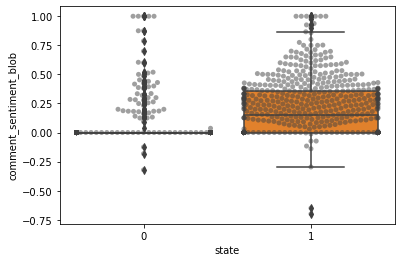

In [184]:
# Visualise the relationship
sns.boxplot(x="state", y="comment_sentiment_blob", data=data_text)
sns.swarmplot(x="state", y="comment_sentiment_blob", data=data_text, color=".25", alpha=0.5)

In [185]:
#### success state has a higher positive sentiment from comments, around 0.2. 
#### Median Sentiment for failed state is 0 cos most of them does not have comment.

In [187]:
# look at why sentiment is extremely low for the success state
pd.set_option('display.max_colwidth', 500)
data_text[data_text["comment_sentiment_blob"] < -0.5]["comments"]

404                                                 over 5 ago So how ' s it coming ? over 5 ago " One is the number that you ' ever do Two can be as bad as one It ' s the number since the number one "
762    over 5 ago Hello everyone . I ' m am very sorry for the delay in getting all the out . I want you all to know that I have not forgotten everyone and do not plan on not my work . about 6 ago Yeah
Name: comments, dtype: object

In [188]:
pd.reset_option('display.max_colwidth')

### Feature engineering 2: Add sentiment score using Affinn (detect emojis)

In [49]:
#Use affinn score (to detect emoji)
afinn = Afinn(emoticons=True)

afinn_scores = [afinn.score(text) for text in data_text.comments]
data_text['comments_afinn'] = afinn_scores

<ipython-input-49-0b875383aecc>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_text['comments_afinn'] = afinn_scores


In [195]:
data_text[data_text["comments"] != "No yet ."].loc[:,["comments","comments_afinn"]].head(10)

,comments,comments_afinn
4,"over 6 ago So sorry your goal ' t met , but I ...",2.0
6,about 1 month ago It ' s been an incredibly ye...,174.0
7,7 ago PageLess just Joe save $ 385 . 00 on his...,4.0
8,11 ago Cool initiative ! How it ' s different ...,7.0
10,Sole about 6 ago Happy Birthday ! S + C + A + ...,11.0
11,over 1 year ago Have we been sent the yet ? ju...,36.0
18,"Sherry Collins - about 8 ago WOW !, YOU ARE SO...",45.0
19,"over 7 ago Thanks "" Pan - portal "" I like that...",19.0
21,about 1 year ago Never mind I am just a dick w...,7.0
23,Terry Smith over 7 ago Received my package in ...,8.0


<AxesSubplot:xlabel='state', ylabel='comments_afinn'>

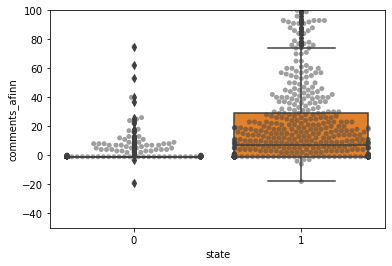

In [196]:
sns.boxplot(x="state", y="comments_afinn", data=data_text).set(ylim=(-50, 100))
sns.swarmplot(x="state", y="comments_afinn", data=data_text, color=".25", alpha=0.5)

In [50]:
#Add affinn to story

afinn_scores = [afinn.score(text) for text in data_text.story]
data_text['story_afinn'] = afinn_scores

<ipython-input-50-fb8367e2cd61>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_text['story_afinn'] = afinn_scores


In [53]:
#Add affinn to faq_comment

afinn_scores = [afinn.score(text) for text in data_text.faq_comments]
data_text['faq_comments_afinn'] = afinn_scores

<ipython-input-53-b67372cafbe8>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_text['faq_comments_afinn'] = afinn_scores


In [54]:
#Add affinn to blurb_name

afinn_scores = [afinn.score(text) for text in data_text.blurb_name]
data_text['blurb_name_afinn'] = afinn_scores

<ipython-input-54-5dbb9756c23a>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_text['blurb_name_afinn'] = afinn_scores


In [56]:
#Add affinn to blurb

afinn_scores = [afinn.score(text) for text in data_text.blurb]
data_text['blurb_afinn'] = afinn_scores

<ipython-input-56-d374ea210022>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_text['blurb_afinn'] = afinn_scores


In [57]:
#Add affinn to name

afinn_scores = [afinn.score(text) for text in data_text.name]
data_text['name_afinn'] = afinn_scores

<ipython-input-57-9cb844ad9c38>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_text['name_afinn'] = afinn_scores


In [55]:
data_text.head()

,blurb_name,comments,story,faq,state,faq_comments,blurb,name,comments_afinn,story_afinn,faq_comments_afinn,blurb_name_afinn
0,With your help we will create this device that...,No comments yet.,Producto Final\nHi! The funds we will used to ...,[' '],0,[' ']No comments yet.,With your help we will create this device that...,Save water 100% liquid downloads in toilets at...,-1.0,-10.0,-1.0,4.0
1,We at Ormiston Primary are looking at starting...,No comments yet.,At Ormiston Primary School we are looking at c...,[' '],0,[' ']No comments yet.,We at Ormiston Primary are looking at starting...,Ormiston Primary Community Garden,-1.0,15.0,-1.0,1.0
2,Self-taught aspiring metalsmith Looking for he...,No comments yet.,Hello world :-] My name is Bryan. I have been ...,[' '],0,[' ']No comments yet.,Self-taught aspiring metalsmith Looking for he...,"Aspiring metalsmith in need of better tools, a...",-1.0,25.0,-1.0,4.0
3,So many women believe they are past their prim...,No comments yet.,I'm tired of woman being overlooked and consid...,[' '],0,[' ']No comments yet.,So many women believe they are past their prim...,Beauty At Any Age,-1.0,14.0,-1.0,3.0
4,The Horror Zine's Jeani Rector brings us anoth...,Paula Limbaugh\nover 6 years ago\nSo sorry you...,Table of Contents\n• TAPEWORM by Martin Rose\n...,[' '],0,[' ']Paula Limbaugh\nover 6 years ago\nSo so...,The Horror Zine's Jeani Rector brings us anoth...,Shrieks and Shivers from the Horror Zine,2.0,2.0,2.0,4.0


### Add the new sentiment cols to orginal dataset

In [58]:
data["comments_afinn"] = data_text['comments_afinn']
data["story_afinn"] = data_text['story_afinn']
data["faq_comments_afinn"] = data_text['faq_comments_afinn']
data["blurb_name_afinn"] = data_text['blurb_name_afinn']
data["blurb_afinn"] = data_text['blurb_afinn']
data["name_afinn"] = data_text['name_afinn']

In [59]:
pd.set_option('display.max_columns', None)
data.sample(3)

,backers_count,blurb,category,converted_pledged_amount,country,created_at,current_currency,deadline,fx_rate,goal,id,launched_at,location,name,pledged,profile,slug,source_url,spotlight,staff_pick,state,state_changed_at,static_usd_rate,urls,usd_pledged,usd_type,story,faq,num_faq,comments,n_comments,duration,parent_category,category_name,location_name,month_launched,year_launched,backers_count_log,goal_log,pledged_log,duration_log,n_comments_log,num_faq_bool,avg_fund_per_backer,comments_afinn,blurb_name,faq_comments,story_afinn,faq_comments_afinn,blurb_name_afinn,blurb_afinn,name_afinn
240,65,Expanding the list of offerings at Revolver St...,"{'id': 256, 'name': 'Spaces', 'slug': 'dance/s...",4580,US,2019-05-29 14:37,USD,2019-07-31 11:21,1.000000,4500,302938875,2019-06-30 11:21,"{""id"":2486726,""name"":""St. Cloud"",""slug"":""st-cl...",Aerial Arts at Revolver Studios,4580.0,"{""id"":3742515,""project_id"":3742515,""state"":""in...",aerial-arts-at-revolver-studios,https://www.kickstarter.com/discover/categorie...,True,False,1,2019-07-31 11:21,1.00000,"{""web"":{""project"":""https://www.kickstarter.com...",4580.00000,domestic,This project is to support Revolver Studios in...,[' '],0,No comments yet.,0.0,31,Dance,Spaces,St. Cloud,6,2019,0.523933,0.051394,0.532914,0.072745,-0.710711,0,70.461538,-1.0,Expanding the list of offerings at Revolver St...,[' ']No comments yet.,88.0,-1.0,0.0,0.0,0.0
57,75,A collection of Victorian-era inspired strange...,"{'id': 262, 'name': 'Accessories', 'slug': 'fa...",1888,US,2019-07-13 20:21,USD,2019-08-19 11:56,1.000000,300,570540023,2019-07-20 11:56,"{""id"":2459115,""name"":""New York"",""slug"":""new-yo...",Strange Objects Enamel Pin Project,1888.0,"{""id"":3772309,""project_id"":3772309,""state"":""in...",strange-objects-enamel-pin-project,https://www.kickstarter.com/discover/categorie...,True,False,1,2019-08-19 11:56,1.00000,"{""web"":{""project"":""https://www.kickstarter.com...",1888.00000,international,"Hello,\nI'm Lucretia, (Lulu for short); a New ...",[' '],0,Nicole\nover 1 year ago\nAre there extra pins ...,10.0,30,Fashion,Accessories,New York,7,2019,0.601180,-1.382459,0.252602,-0.012145,0.942071,0,25.173333,36.0,A collection of Victorian-era inspired strange...,[' ']Nicole\nover 1 year ago\nAre there extr...,9.0,36.0,0.0,0.0,-1.0
937,3,"Exciting full length feature, gritty urban dra...","{'id': 293, 'name': 'Drama', 'slug': 'film & v...",10684,GB,2020-09-15 10:26,USD,2020-11-30 12:55,1.382164,148900,1395997121,2020-10-01 12:55,"{""id"":36240,""name"":""Stoke-on-Trent"",""slug"":""st...",Atomic,8011.0,"{""id"":4071653,""project_id"":4071653,""state"":""in...",atomic,https://www.kickstarter.com/discover/categorie...,False,False,0,2020-11-30 12:55,1.28372,"{""web"":{""project"":""https://www.kickstarter.com...",10283.88188,domestic,ATOMIC FILM PRODUCTION\nWe are campaigning fo...,[' '],0,No comments yet.,0.0,60,Film & Video,Drama,Stoke-on-Trent,10,2020,-1.011032,1.906156,0.709803,1.797704,-0.710711,0,2670.333333,-1.0,"Exciting full length feature, gritty urban dra...",[' ']No comments yet.,5.0,-1.0,3.0,3.0,0.0


In [203]:
data.to_csv (r'.\GitHub\BT4222_GrpProject\Output\data_clean&processed_addedsentiment.csv', index = False, header=True)

# Part 4: Text analysis on comments+faq

In [ ]:
#FAQ combined with comments as faq itself is not useful (too many data without any faq)

In [30]:
# define X and y
X = data_text.faq_comments
y = data_text.state

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

#Get null accuracy
y_test.value_counts().head(1) / y_test.shape

1    0.619433
Name: state, dtype: float64

In [31]:
#use default params (CountVect)
vect = CountVectorizer()
tokenize_test(X_train, y_train, X_test, y_test, vect)

Features:  13814
Training Accuracy:  0.7466124661246613
Validation Accuracy:  0.7004048582995951


In [60]:
#After tune
# Tuninng params 1
vect = CountVectorizer(ngram_range=(1, 3), min_df=2, stop_words='english', max_df=0.7)
tokenize_test(X_train, y_train, X_test, y_test, vect)

print("\nresult better than null")

Features:  9650
Training Accuracy:  0.7791327913279132
Validation Accuracy:  0.6923076923076923

result better than null


### Use NLTK & Lemmatization preprocessing

In [62]:
# To lower case
data_text_nlkt = data_text.copy()
data_text_nlkt['faq_comments'] = [entry.lower() for entry in data_text_nlkt['faq_comments']]

# Tokenise
data_text_nlkt['faq_comments']= [word_tokenize(entry) for entry in data_text_nlkt['faq_comments']]

#Word lemma
tag_map = defaultdict(lambda : wn.NOUN)
tag_map['J'] = wn.ADJ
tag_map['V'] = wn.VERB
tag_map['R'] = wn.ADV

for index,entry in enumerate(data_text_nlkt['faq_comments']):
    # Declaring Empty List to store the words that follow the rules for this step
    Final_words = []
    
    # Initializing WordNetLemmatizer()
    word_Lemmatized = WordNetLemmatizer()
    
    # pos_tag function below will provide the 'tag' i.e if the word is Noun(N) or Verb(V) or something else.
    for word, tag in pos_tag(entry):
        # Below condition is to check for Stop words and consider only alphabets
        if word not in stopwords.words('english') and word.isalpha():
            word_Final = word_Lemmatized.lemmatize(word,tag_map[tag[0]])
            Final_words.append(word_Final)
    # The final processed set of words for each iteration will be stored in 'text_final'
    data_text_nlkt.loc[index,'text_final'] = str(Final_words)

In [63]:
data_text_nlkt['text_final'][42]

"['chanel', 'casteelcreator', 'almost', 'year', 'ago', 'thank', 'everyone', 'effort', 'mean', 'much', 'u', 'encourage', 'pledge', 'please', 'bring', 'donation', 'directly', 'theater', 'mail', 'cinema', 'u', 'port', 'richey', 'fl', 'absolutely', 'everything', 'keep', 'door', 'open', 'movie', 'play', 'card', 'charge', 'pledge', 'june', 'unless', 'entire', 'pledge', 'chanel', 'casteelcreator', 'almost', 'year', 'ago', 'please', 'remember', 'receive', 'pledge', 'donation', 'june', 'receive', 'money', 'frank', 'novatsky', 'almost', 'year', 'ago', 'great', 'little', 'family', 'own', 'theater', 'affordable', 'clean', 'staff', 'wonderful', 'folk', 'food', 'really', 'good', 'affordable', 'theater', 'table', 'seat', 'nice', 'relaxed', 'dining', 'movie', 'experience', 'new', 'port', 'richey', 'area', 'please', 'stop', 'see', 'movie', 'please', 'donate', 'keep', 'gem', 'open', 'fwiw', 'affiliation', 'theater', 'besides', 'satisfied', 'customer', 'year', 'chanel', 'casteelcreator', 'almost', 'year'

In [64]:
X_train, X_test, y_train, y_test = train_test_split(data_text_nlkt['text_final'], data_text_nlkt["state"], random_state=42)

In [70]:
#use CountVect
vect = CountVectorizer(ngram_range=(1, 3), min_df=2, stop_words='english', max_df=0.7)
tokenize_test(X_train, y_train, X_test, y_test, vect)

Features:  8758
Training Accuracy:  0.7737127371273713
Validation Accuracy:  0.6923076923076923


In [80]:
#Use TF-IDF
vect = TfidfVectorizer(ngram_range=(1, 3), min_df=2, stop_words='english', max_df=0.7, norm='l2')
tokenize_test(X_train, y_train, X_test, y_test, vect)

print("\nTF-IDF score is slightly better in validation")

Features:  8758
Training Accuracy:  0.7411924119241192
Validation Accuracy:  0.7125506072874493

TF-IDF score is slightly better in validation


In [83]:
vect = TfidfVectorizer(ngram_range=(1, 3), min_df=2, stop_words='english', max_df=0.7, norm='l2')

X_train_dtm = vect.fit_transform(X_train)
X_test_dtm = vect.transform(X_test)

nb = MultinomialNB()
nb.fit(X_train_dtm, y_train)
y_pred_class = nb.predict(X_test_dtm)

fail_token_ratio = nb.feature_count_[0] / nb.class_count_[0]
success_token_ratio = nb.feature_count_[1] / nb.class_count_[1]

success_tokens = {'token': vect.get_feature_names(), 'ratio': (success_token_ratio+1)/(fail_token_ratio+1)}
success_tokens = pd.DataFrame(data=success_tokens)
success_tokens.sort_values("ratio", ascending=False).head(15)

,token,ratio
176,ago,1.095888
8471,year,1.075695
8472,year ago,1.074375
4913,month,1.048331
4914,month ago,1.048306
5638,pledge,1.020163
7878,update,1.017919
7405,thank,1.017313
7472,thanks,1.017083
4518,love,1.014385


In [84]:
#Add own stop words

from sklearn.feature_extraction import text
my_stop_words = text.ENGLISH_STOP_WORDS.union(["ago","year","month"])

In [86]:
vect = TfidfVectorizer(ngram_range=(1, 3), min_df=2, stop_words=my_stop_words, max_df=0.7, norm='l2')

X_train_dtm = vect.fit_transform(X_train)
X_test_dtm = vect.transform(X_test)

nb = MultinomialNB()
nb.fit(X_train_dtm, y_train)
y_pred_class = nb.predict(X_test_dtm)

fail_token_ratio = nb.feature_count_[0] / nb.class_count_[0]
success_token_ratio = nb.feature_count_[1] / nb.class_count_[1]

success_tokens = {'token': vect.get_feature_names(), 'ratio': (success_token_ratio+1)/(fail_token_ratio+1)}
success_tokens = pd.DataFrame(data=success_tokens)
success_tokens.sort_values("ratio", ascending=False).head(15)

,token,ratio
4824,pledge,1.023186
7024,update,1.022108
6558,thank,1.020661
6624,thanks,1.020508
3892,love,1.017375
1250,congratulation,1.016330
5370,receive,1.016146
3818,look,1.015238
2680,great,1.015022
672,book,1.014875


In [ ]:
#Important to address pledge and update about the project
#thanks/love/congratulation/receive are probably confounded with successful fund raised, hence thanking the backers

In [88]:
vect = TfidfVectorizer(ngram_range=(1, 3), min_df=2, stop_words=my_stop_words, max_df=0.7, norm='l2')

X_train_dtm = vect.fit_transform(X_train)
X_test_dtm = vect.transform(X_test)

nb = MultinomialNB()
nb.fit(X_train_dtm, y_train)
y_pred_class = nb.predict(X_test_dtm)

fail_token_ratio = nb.feature_count_[0] / nb.class_count_[0]
success_token_ratio = nb.feature_count_[1] / nb.class_count_[1]

print("Top Tokens in faq_comment that leads to failure")

fail_tokens = {'token': vect.get_feature_names(), 'ratio': (fail_token_ratio+1)/(success_token_ratio+1)}
fail_tokens = pd.DataFrame(data=fail_tokens)
fail_tokens.sort_values("ratio", ascending=False).head(15)

Top Tokens in faq_comment that leads to failure


,token,ratio
1156,comment,1.380548
6744,thu nov,1.002785
1755,dream,1.002533
676,book author,1.002509
6110,smash,1.002500
256,angie,1.002479
6864,torres,1.002387
6659,thanks late,1.002373
1467,danny,1.002317
2867,hector,1.002301


In [ ]:
#Not useful as ratio is low (comment ratio is high due to 'No comment')